In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split

from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron

from sklearn.metrics import balanced_accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
def train_score_plot(base_estimator, label):
    scores = []
    n_estimators_range = range(1,101, 1)
    for n_estimators in n_estimators_range:
        clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=n_estimators,
                                max_features=0.5, max_samples=0.5).fit(X_train, y_train)
        scores.append(balanced_accuracy_score(y_test, clf.predict(X_test)))
#         scores.append(clf.score(X_test, y_test))
    plt.plot(n_estimators_range, scores, label=label)
    axes = plt.gca()
    axes.set_ylim([0, 1])
    plt.legend(loc='lower right')

In [3]:
data = pd.read_csv('glass.csv').drop('Id', axis=1)
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
X = data.drop('Type', axis=1)
y = data.Type
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
labels = ['DecisionTreeClassifier', 'SVC', 'Perceptron']
base_estimators = [DecisionTreeClassifier(max_depth=3), SVC(), Perceptron()]

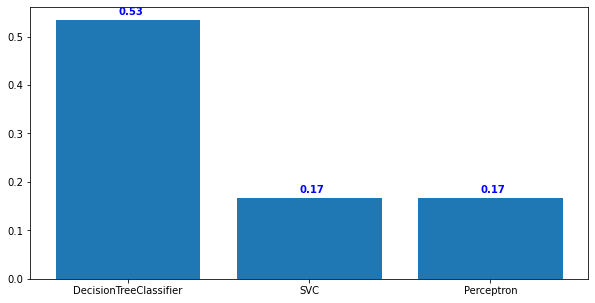

In [6]:
base_estimators_scores = []
for i in range(len(labels)):
    clf = base_estimators[i].fit(X_train, y_train)
#     base_estimators_scores.append(clf.score(X_test, y_test))
    base_estimators_scores.append(balanced_accuracy_score(y_test, clf.predict(X_test)))

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(labels, base_estimators_scores)
for i, v in enumerate(base_estimators_scores):
    ax.text(i - 0.055, v + 0.01, str(round(v, 2)), color='blue', fontweight='bold')

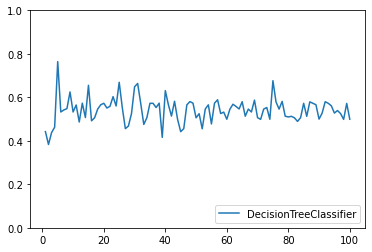

In [7]:
train_score_plot(base_estimators[0], labels[0])

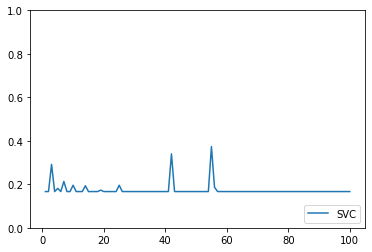

In [8]:
train_score_plot(base_estimators[1], labels[1])

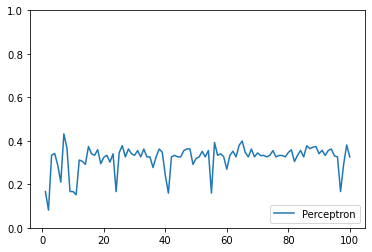

In [9]:
train_score_plot(base_estimators[2], labels[2])

In [10]:
y.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64